# SyriaTel Customer Churn Prediction Model 

Author: Endalkachew Dessalegne

## 1. Project Overview 

This project focuses on building a classifier model to predict whether a customer will ("soon") stop doing business with SyriaTel, a telecommunications company. The company is interested in reducing the money lost because of customers who don't stick around very long. Which factors contribute most to customers churn? are there any predictable patterns in the dataset? 
which model can better predict customers who will churn? 
What correctve action can the company take to reduce number of customers who churn? 

## 1.1. Business Understanding

### 1.1.1. Business Problem

### 1.1.2. Key Business Questions 
* Which factors contribute most to customers churn?
* are there any predictable patterns in the dataset?
* which model can better predict customers who will churn?
* can this predictive model improved
* What correctve action can the company take to reduce number of customers who churn? 



## 2. Data Understanding and Preparation

### 2.1. Data Understanding 
The dataset for this project is obtained from .. website. It consists of 3333 rows, each refers to a customer of a telecom company, and 21 columns, which show different features of customers in the their use of the telecome service. The 'churn' column is the target column where there are two classes of customers, 'True' for customers who stopped doing business with the company and 'False' for customers whe are still doing businss with the company.

### 2.1.1. The Data 

In [519]:
import pandas as pd 
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from scipy import stats 
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix,\
precision_recall_fscore_support, f1_score, plot_confusion_matrix 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
#from sklearn.metrics import roc_curve, auc


In [514]:
df = pd.read_csv("SyriaTel_Customer_Churn.csv") 
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [515]:
# Check number of entries or rows and features or columns 
df.shape

(3333, 21)

In [516]:
# Checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### 2.1.2. Defining Target Variable and Data Train-Test split

* The target variable/column is 'churn' - whether a customer  will soon stop doing business with the company (i.e. 'True') or  will still be doing business with the company(i.e. 'False')

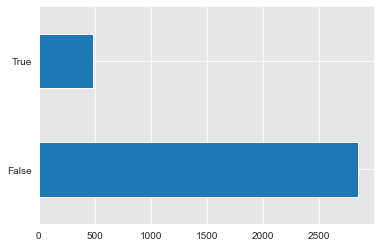

Class distribution : 
 False    2850
True      483
Name: churn, dtype: int64


In [517]:
# Looking at distribusion of our target classes:
df['churn'].value_counts().plot.barh()
plt.show()
print(f"Class distribution : \n {df['churn'].value_counts()}")

* **This shows that the dataset is imbalanced**

* The tagret here is 'churn' column and it is assigned to y, and all other features which are independent variables, are assigned to X.

In [474]:
# The tagret variable, y, is the 'churn' column and all other features are independent variables, X.
# change the bool datatype of 'churn' into values of 0 and 1
df['churn'] = df['churn'].astype(int)
"""
The target variable is 'churn':
1 = Customer churned
0 = Customer stayed
"""

"\nThe target variable is 'churn':\n1 = Customer churned\n0 = Customer stayed\n"

In [475]:
# asign y to the target variable and X to independent variables
y = df["churn"] 
X = df.drop("churn", axis=1) 

In [476]:
# split the data to train and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## 3. Data Preprocessing 

### 3.1. Dealing with Missing Data and Drop Irrelevant columns

In [477]:
# check for missing data in the X_train set
X_train.isna().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
dtype: int64

* There are no missing data in the X_train dataset

In [478]:
# get list of all columns in X_train
X_train.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls'],
      dtype='object')

* There are some columns or features which are not important in influencing the customers' decision to churn or not.
* These include 'state', 'area code' and 'phone number'. Therefore, these columns are droped.

In [479]:
# drop not relevant columns
features_to_drop = ['state', 'area code', 'phone number']
X_train = X_train.drop(features_to_drop, axis=1) 
print(X_train.shape)
X_train.head(2) 


(2499, 17)


,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
427,67,no,yes,40,104.9,65,17.83,216.3,93,18.39,217.4,128,9.78,9.6,9,2.59,1
1656,101,no,yes,28,105.9,132,18.00,231.7,107,19.69,281.3,120,12.66,10.7,5,2.89,1


* Now 17 relevant columns to work with.

### 3.2. Dealing with Categorical Data

In [480]:
# Categorical data(i.e Dtype object) are dealt as X_train_categorical variable 
X_train_categorical = X_train.select_dtypes(include=['object']).copy()
X_train_categorical.head() 

,international plan,voice mail plan
427,no,yes
1656,no,yes
1042,yes,yes
1867,yes,yes
346,no,yes


* Categorical variables are converted into dummy encoded variables 


In [481]:
#X_train categorical varibles are converted to dummy encoded variables
X_train_encoded = pd.get_dummies(X_train_categorical, columns=['international plan', 'voice mail plan'], drop_first=True)

print(X_encoded.head()) 

      international plan_yes  voice mail plan_yes
427                        0                    1
1656                       0                    1
1042                       1                    1
1867                       1                    1
346                        0                    1


### 3.3. Normalization of data 
* The numeric features of the data are not on the same scale.
* All features are normalized to a consistent scale of 0 to 1

In [482]:
# first asign  X_train_numeric variable to numeric features of X_train 
# include 'int64' and 'float' data types
X_train_numeric = X_train.select_dtypes(include=['int64', 'float']).copy()
X_train_numeric.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
427,67,40,104.9,65,17.83,216.3,93,18.39,217.4,128,9.78,9.6,9,2.59,1
1656,101,28,105.9,132,18.00,231.7,107,19.69,281.3,120,12.66,10.7,5,2.89,1
1042,91,24,93.5,112,15.90,183.4,128,15.59,240.7,133,10.83,9.9,3,2.67,0
1867,142,25,191.1,109,32.49,149.6,120,12.72,227.8,60,10.25,9.8,3,2.65,0
346,81,33,161.6,117,27.47,123.0,90,10.46,261.3,101,11.76,12.2,5,3.29,1


In [483]:
# MinMaxScaler is used to scale all features 
scaler = MinMaxScaler() 
scaler.fit(X_train_numeric) 
X_train_scaled = pd.DataFrame(
    scaler.transform(X_train_numeric), 
    index=X_train_numeric.index, 
    columns=X_train_numeric.columns
) 
X_train_scaled.head()

,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
427,0.285714,0.784314,0.299031,0.393939,0.298960,0.594721,0.547059,0.594953,0.522324,0.725191,0.522415,0.480,0.45,0.479630,0.111111
1656,0.432900,0.549020,0.301881,0.800000,0.301811,0.637064,0.629412,0.637011,0.694190,0.664122,0.694561,0.535,0.25,0.535185,0.111111
1042,0.389610,0.470588,0.266534,0.678788,0.266600,0.504262,0.752941,0.504368,0.584992,0.763359,0.585176,0.495,0.15,0.494444,0.000000
1867,0.610390,0.490196,0.544755,0.660606,0.544769,0.411328,0.705882,0.411517,0.550296,0.206107,0.550508,0.490,0.15,0.490741,0.000000
346,0.346320,0.647059,0.460661,0.709091,0.460597,0.338191,0.529412,0.338402,0.640398,0.519084,0.640765,0.610,0.25,0.609259,0.111111


* Concatenate X_train_encoded and X_train_scaled together.

In [484]:
X_train_all = pd.concat([X_train_encoded, X_train_scaled], axis=1)
X_train_all.head()

,international plan_yes,voice mail plan_yes,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
427,0,1,0.285714,0.784314,0.299031,0.393939,0.298960,0.594721,0.547059,0.594953,0.522324,0.725191,0.522415,0.480,0.45,0.479630,0.111111
1656,0,1,0.432900,0.549020,0.301881,0.800000,0.301811,0.637064,0.629412,0.637011,0.694190,0.664122,0.694561,0.535,0.25,0.535185,0.111111
1042,1,1,0.389610,0.470588,0.266534,0.678788,0.266600,0.504262,0.752941,0.504368,0.584992,0.763359,0.585176,0.495,0.15,0.494444,0.000000
1867,1,1,0.610390,0.490196,0.544755,0.660606,0.544769,0.411328,0.705882,0.411517,0.550296,0.206107,0.550508,0.490,0.15,0.490741,0.000000
346,0,1,0.346320,0.647059,0.460661,0.709091,0.460597,0.338191,0.529412,0.338402,0.640398,0.519084,0.640765,0.610,0.25,0.609259,0.111111


## 4. Modeling 

* Since the target variable is a category a classification model is used for prediction
* As a **baseline model**, I choose **Logistic Regression** to fit the preprocessed training data set

In [485]:
#instantiate Logestic regression and fit the training data
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear') 
log_model = logreg.fit(X_train_all, y_train) 
log_model

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

## 5. Model Evaluation 
* The performance of the baseline model is evaluated using both the train and test data set
* Since the company is interested in identifyingcustomers who will churn (True postive), finding a model with high precision(higher percentage of the true positive values) is more important.
* Thus, in evaluation and comparison of performance of models, I will use precision of models. Then I will optimize the model to look for a model with high precision.
* 
For the company even if correctly predicting customers who are going to churn(True postive) is very crucial.

* High precision is useful in this case because we need to minimize false positives (wrong positive classifications) which may result in loss of loyal customers.
* It is better to have false negatives than to have false positive and lose a customer


That precission is used as the factor for evaluating performance of the model.

### 5.1. Performance on Training Data 

In [486]:
# first evaluate performance of the model using the training data 
y_train_pred = log_model.predict(X_train_all) 

# find the model evaluation metrics.
Accuracy = accuracy_score(y_train, y_train_pred)  
Precision = precision_score(y_train, y_train_pred) 
Recall = recall_score(y_train, y_train_pred) 
F1_Score = f1_score(y_train, y_train_pred) 

In [487]:
#summary of evaluation metrics of the data
log_model_on_train = pd.DataFrame(["Logestic Regression(On Train Data)", Accuracy, Precision, Recall, F1_Score]).transpose() 
log_model_on_train.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score'] 
log_model_on_train

,Model,Accuracy,Precision,Recall,F1_Score
0,Logestic Regression(On Train Data),0.853141,0.504274,0.160326,0.243299


### 5.2. Performance on Testing Data 
* Before the model is evaluated on the test set, the same preprocessing is applied to it.

In [488]:
# drop not relevant columns
features_to_drop = ['state', 'area code', 'phone number']
X_test = X_test.drop(features_to_drop, axis=1) 

# Categorical data(i.e Dtype object) are dealt as X_train_categorical variable 
X_test_categorical = X_test.select_dtypes(include=['object']).copy() 

#Categorical variables are converted into dummy encoded variables
X_test_encoded = pd.get_dummies(X_test_categorical, columns=['international plan', 'voice mail plan'], drop_first=True)
 
# Normalization
X_test_numeric = X_test.select_dtypes(include=['int64', 'float']).copy()
X_test_scaled = pd.DataFrame(
    scaler.transform(X_test_numeric), 
    index=X_test_numeric.index, 
    columns=X_test_numeric.columns
)
# Concatenating categorical and numeric data
X_test_all = pd.concat([X_test_encoded, X_test_scaled], axis=1)
X_test_all.head()

,international plan_yes,voice mail plan_yes,account length,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
405,1,0,0.393939,0.000000,0.753421,0.551515,0.753353,0.442398,0.676471,0.442575,0.471759,0.305344,0.472206,0.465,0.25,0.464815,0.000000
118,0,1,0.480519,0.705882,0.324116,0.709091,0.324111,0.433049,0.482353,0.433193,0.415277,0.648855,0.415421,0.500,0.15,0.500000,0.222222
710,0,0,0.294372,0.000000,0.556727,0.424242,0.556673,0.595821,0.635294,0.595924,0.636633,0.656489,0.637179,0.625,0.20,0.625926,0.333333
499,0,0,0.406926,0.000000,0.499430,0.551515,0.499329,0.671982,0.641176,0.671951,0.141474,0.473282,0.141662,0.375,0.10,0.375926,0.111111
2594,1,0,0.493506,0.000000,0.984322,0.490909,0.984239,0.559252,0.623529,0.559366,0.522593,0.564885,0.523013,0.590,0.40,0.590741,0.111111


In [489]:
# Evaluate the model's performance on testing data
y_test_pred = log_model.predict(X_test_all) 

# find the model evaluation metrics
Accuracy_2 = accuracy_score(y_test, y_test_pred)  
Precision_2 = precision_score(y_test, y_test_pred) 
Recall_2 = recall_score(y_test, y_test_pred) 
F1_Score_2 = f1_score(y_test, y_test_pred) 

In [490]:
#Summary of the evaluation metrics of the model
log_model_on_test = pd.DataFrame(["Logestic Regression(On Test Data)", Accuracy_2, Precision_2, Recall_2, F1_Score_2]).transpose() 
log_model_on_test.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score'] 
log_model_on_test

,Model,Accuracy,Precision,Recall,F1_Score
0,Logestic Regression(On Test Data),0.86211,0.5,0.147826,0.228188


### 5.3. Comparison of performance of the model 

* Summarize how the model performed on training and testing data 
* Performance comparison focuses on precision of the model

In [491]:
log_models = pd.concat([log_model_on_train, log_model_on_test], axis=0) 
log_models.reset_index(drop=True)

,Model,Accuracy,Precision,Recall,F1_Score
0,Logestic Regression(On Train Data),0.853141,0.504274,0.160326,0.243299
1,Logestic Regression(On Test Data),0.86211,0.5,0.147826,0.228188


* The precision of the model on both the training and testing data, which is around 0.5, is poor.
* This means only 50% of the customers who will churn will be correctly predicted. 
* The accuracy of the model is better, but it is misleading because the dataset is imbalanced.
* The recall-score is also very low which indicates that lower percentage actual positives were correctly identified.
* Thus, I will check if the precision of the model improves by addressing the imbalance in the dataset.

### 5.4. Updating Model with class balance 

In [492]:
# The original dataset shows imbalanced class distribution
print('Original dataset class distribution: \n') 
print(y.value_counts()) 

Original dataset class distribution: 

0    2850
1     483
Name: churn, dtype: int64


* This class distribution imbalance may have affected the above model and should be corrected.
* SMOTE (Synthetic Minority Over-sampling Technique) method is used to handle imbalanced datasets by generating synthetic samples for the minority class, in this case class 1 or 'True'.

In [493]:
# use SMOTE to balance class distribution 
smote = SMOTE()
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_all, y_train) 

print('Synthetic sample class distribution: \n') 
print(y_train_resampled.value_counts()) 

Synthetic sample class distribution: 

1    2131
0    2131
Name: churn, dtype: int64


### 5.5. Model performance on balanced data

In [494]:
# instantiate and fit the optimaized model
logreg_balanced = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear') 

log_model_balanced = logreg.fit(X_train_resampled, y_train_resampled) 
log_model_balanced

LogisticRegression(C=1000000000000.0, fit_intercept=False, solver='liblinear')

In [495]:
# model performance on train data 
y_train_resampled_pred = log_model_balanced.predict(X_train_resampled)  

# model performance on test data 
y_test_resampled_pred = log_model_balanced.predict(X_test_all)

In [496]:
# classfication metrics for model on train set
Accuracy_3= accuracy_score(y_train_resampled, y_train_resampled_pred)  
Precision_3 = precision_score(y_train_resampled, y_train_resampled_pred) 
Recall_3 = recall_score(y_train_resampled, y_train_resampled_pred) 
F1_Score_3 = f1_score(y_train_resampled, y_train_resampled_pred) 

# classfication metrics for model on train set
Accuracy_4= accuracy_score(y_test, y_test_resampled_pred)  
Precision_4 = precision_score(y_test, y_test_resampled_pred) 
Recall_4 = recall_score(y_test, y_test_resampled_pred) 
F1_Score_4 = f1_score(y_test, y_test_resampled_pred) 

In [497]:
#summary of evaluation metrics of the training and testing data
#on train data
log_model_balanced_on_train = pd.DataFrame(["Logestic Regression (SMOTE_Train_Data)", Accuracy_3, Precision_3, Recall_3, F1_Score_3]).transpose() 
log_model_balanced_on_train.columns = ['Model', 'Accuracy', 'Precision', 'Recall','F1_Score' ] 

# on test data
log_model_balanced_on_test = pd.DataFrame(["Logestic Regression (SMOTE_Test_Data)", Accuracy_4, Precision_4, Recall_4, F1_Score_4]).transpose() 
log_model_balanced_on_test.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score'] 

log_models_bala = pd.concat([log_model_on_train, log_model_on_test, log_model_balanced_on_train, log_model_balanced_on_test], axis=0) 
log_models_bala.reset_index(drop=True) 

,Model,Accuracy,Precision,Recall,F1_Score
0,Logestic Regression(On Train Data),0.853141,0.504274,0.160326,0.243299
1,Logestic Regression(On Test Data),0.86211,0.5,0.147826,0.228188
2,Logestic Regression (SMOTE_Train_Data),0.755514,0.751037,0.76443,0.757674
3,Logestic Regression (SMOTE_Test_Data),0.701439,0.270548,0.686957,0.388206


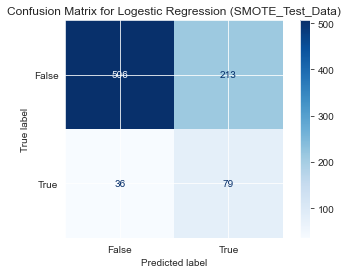

In [498]:
# Plot confusion Matrix
cm = confusion_matrix(y_test, y_test_resampled_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False', 'True'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for Logestic Regression (SMOTE_Test_Data)")
plt.show()

* Precision of updated model on train data set has improved compared to the baseline model.
* Its accuracy has decreased but its recall score has improved.
* Since precision of updated model, on test set of data, which reflects real-world performance on imbalanced data, is low(0.27)
* Thus, we have to find a new model which with better precision.
* DecisionTreeClassifier will be the the new model to be tested.

### 5.6. Decisssion Tree Model

In [411]:
# Create the classifier, fit it on the training data and make predictions on the test set
dtree = DecisionTreeClassifier(criterion='entropy')  
# fit the model
dtree.fit(X_train_resampled, y_train_resampled) 


DecisionTreeClassifier(criterion='entropy')

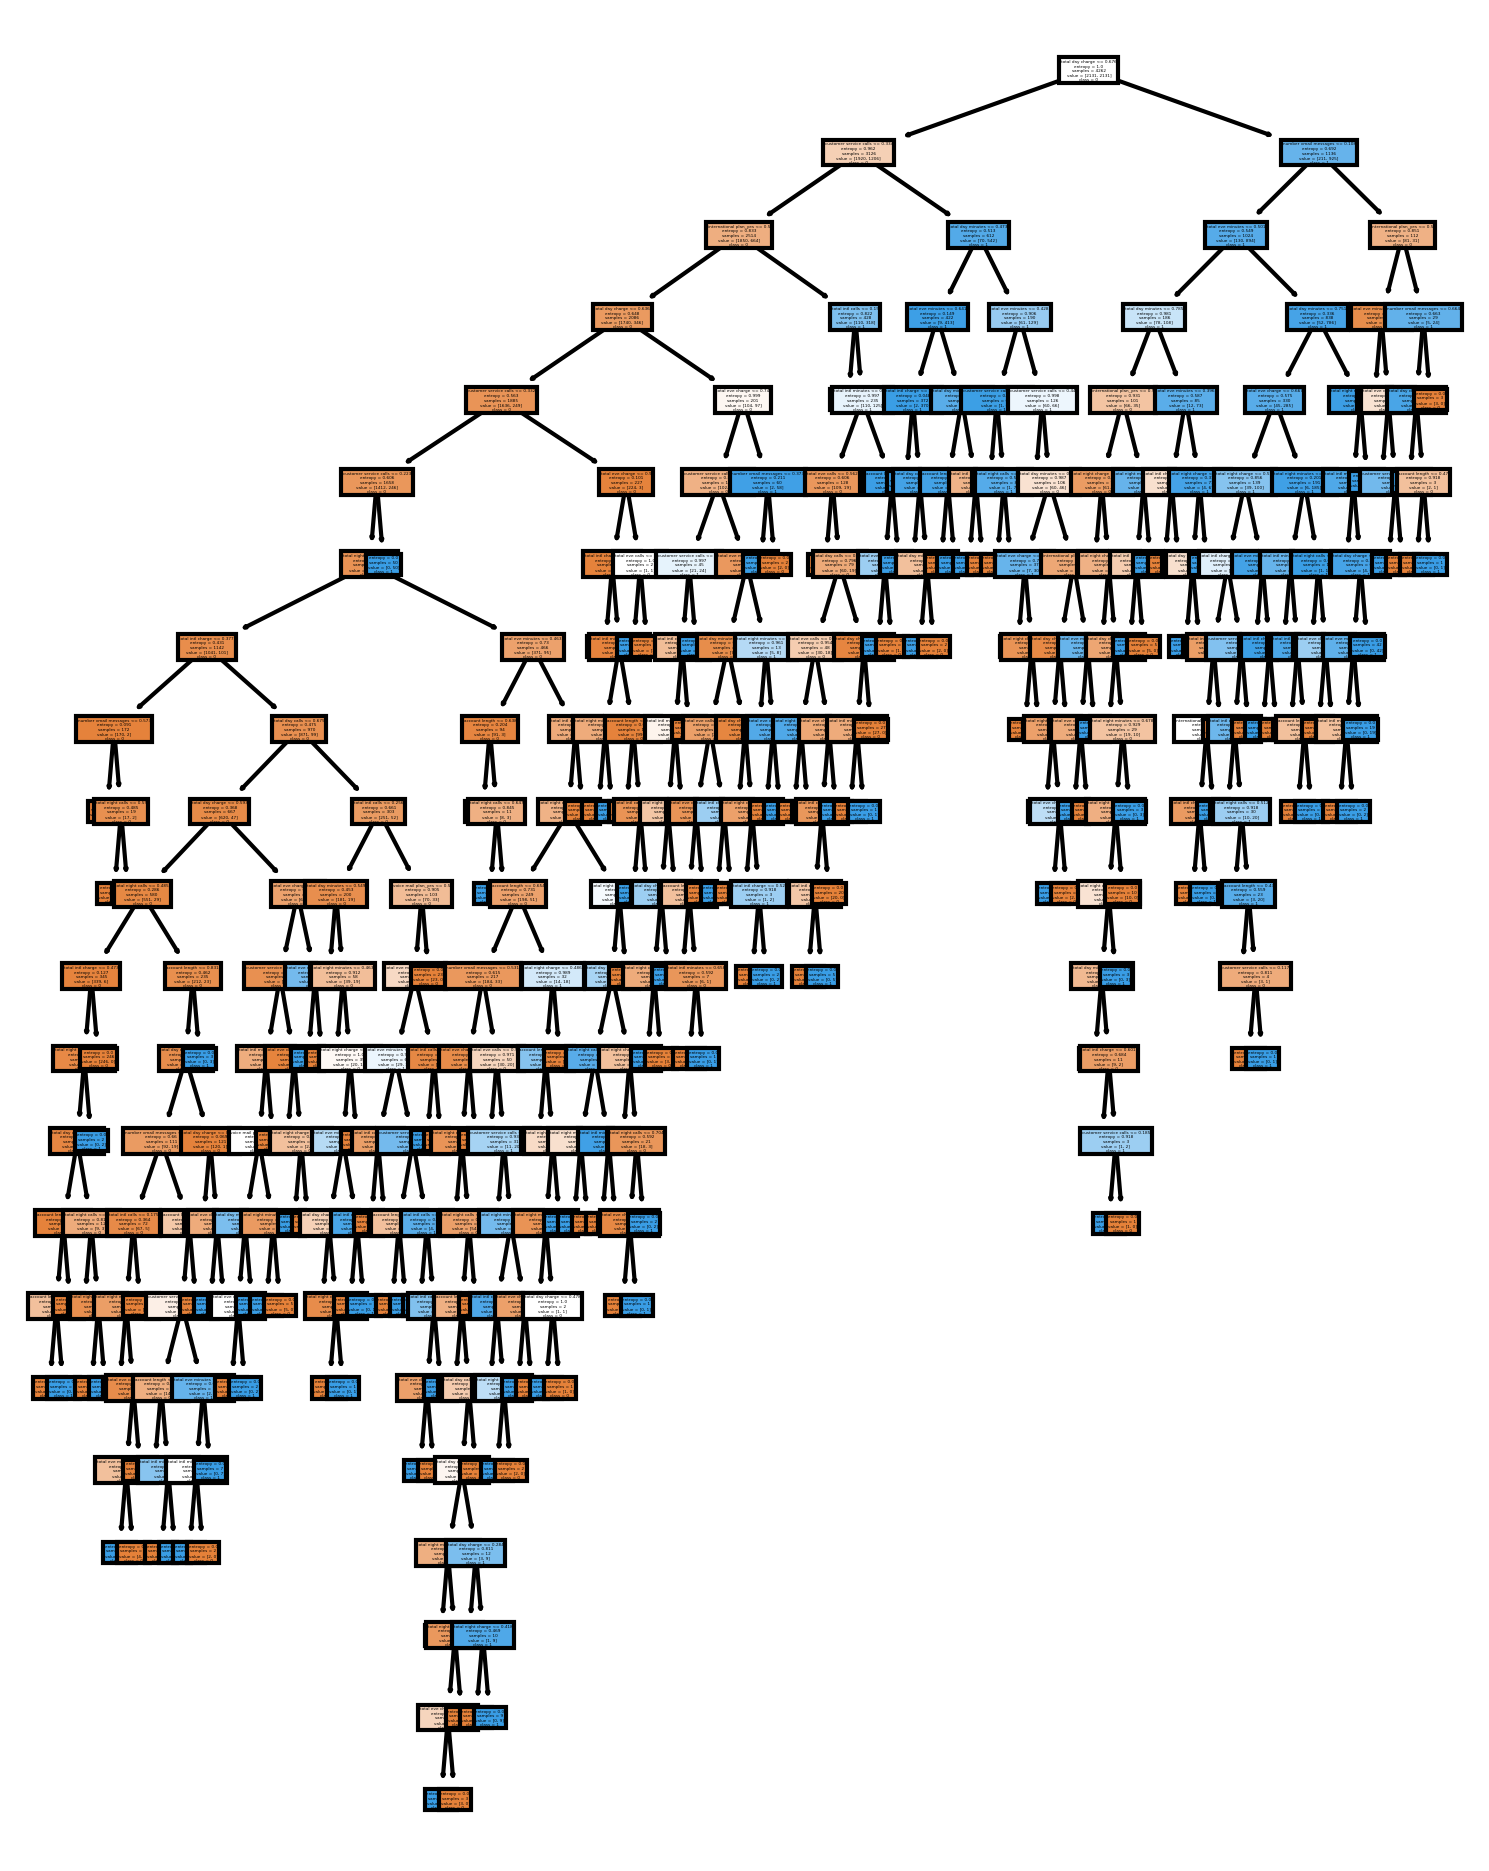

In [412]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (6,8), dpi=300)
tree.plot_tree(dtree,
               feature_names = X_train_all.columns, 
               class_names=np.unique(y).astype('str'),
               filled = True) 
plt.show()

In [413]:
# evaluate the performance both on training and testing data 
y_train_dtree_pred = dtree.predict(X_train_resampled)
y_test_dtree_pred = dtree.predict(X_test_all) 

In [499]:
Accuracy_5 = accuracy_score(y_train_resampled, y_train_dtree_pred)  
Precision_5 = precision_score(y_train_resampled, y_train_dtree_pred) 
Recall_5 = recall_score(y_train_resampled, y_train_dtree_pred) 
F1_Score_5 = f1_score(y_train_resampled, y_train_dtree_pred) 

Accuracy_6 = accuracy_score(y_test, y_test_dtree_pred)  
Precision_6 = precision_score(y_test, y_test_dtree_pred) 
Recall_6 = recall_score(y_test, y_test_dtree_pred) 
F1_Score_6 = f1_score(y_test, y_test_dtree_pred) 

In [500]:
#summary of evaluation metrics of the training and testing data
#on train data
dtree_model_on_train = pd.DataFrame(["DecisionTreeClassifier(On_Train_Data)", Accuracy_5, Precision_5, Recall_5, F1_Score_5]).transpose() 
dtree_model_on_train.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score'] 

# on test data
dtree_model_on_test = pd.DataFrame(["DecisionTreeClassifier(On_Test_Data)", Accuracy_6, Precision_6, Recall_6, F1_Score_6]).transpose() 
dtree_model_on_test.columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1_Score'] 

log_models_bala = pd.concat([dtree_model_on_train, dtree_model_on_test], axis=0) 
log_models_bala.reset_index(drop=True)

,Model,Accuracy,Precision,Recall,F1_Score
0,DecisionTreeClassifier(On_Train_Data),1,1,1,1
1,DecisionTreeClassifier(On_Test_Data),0.896882,0.592357,0.808696,0.683824


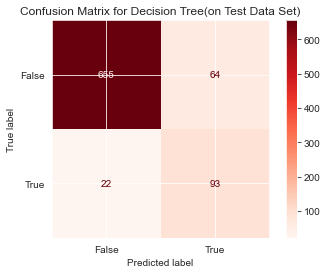

In [501]:
# Plot confusion Matrix
cm = confusion_matrix(y_test, y_test_dtree_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['False', 'True'])
disp.plot(cmap='Reds', values_format='d')
plt.title("Confusion Matrix for Decision Tree(on Test Data Set)")
plt.show()

In [502]:
# Summary of classification matrix for Logestic regrression and DecisionTree classifier
log_models_bala = pd.concat([log_model_on_train, log_model_on_test, log_model_balanced_on_train, log_model_balanced_on_test, dtree_model_on_train, dtree_model_on_test], axis=0) 
log_models_bala.reset_index(drop=True)

,Model,Accuracy,Precision,Recall,F1_Score
0,Logestic Regression(On Train Data),0.853141,0.504274,0.160326,0.243299
1,Logestic Regression(On Test Data),0.86211,0.5,0.147826,0.228188
2,Logestic Regression (SMOTE_Train_Data),0.755514,0.751037,0.76443,0.757674
3,Logestic Regression (SMOTE_Test_Data),0.701439,0.270548,0.686957,0.388206
4,DecisionTreeClassifier(On_Train_Data),1,1,1,1
5,DecisionTreeClassifier(On_Test_Data),0.896882,0.592357,0.808696,0.683824


* Compared to Logestic regression, the performance of the DecisionTree model shows improved 
* Precision of the model, on test data set, is 59%. This is a significant change. 
* Next, the performance of Decision Tree model will be optimized by selecting the best values for parameters like max_depth, min_samples_split, and criterion.